In [72]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [193]:
class Line:
    def __init__(self, m = 0, b = 0):
        self.m = m
        self.b = b
        self.f = lambda x: (m*x)+b

In [414]:
l1 = Line(-1, 5)
l2 = Line(-1, 10)
l3 = Line(-1, 15)

In [415]:
rng = np.random.default_rng()

In [416]:
def get_y_adds(size):
    return(((rng.integers(low = 1, high = 20, size = size))-10)/20)

In [417]:
sizeA = 100*5
sizeB = 260*5

sizeS = 5
# 10% = 10
# 20% = 5
# 25% = 4
# 50% = 2

In [418]:
X1 = rng.integers(low = 10, high = 41, size = sizeA)/10
Y1 = l1.f(X1) + get_y_adds(sizeA)

X1s = X1[:len(X1)//sizeS]
Y1s = Y1[:len(Y1)//sizeS]

In [419]:
X2 = rng.integers(low = 10, high = 91, size = sizeB)/10
Y2 = l2.f(X2) + get_y_adds(sizeB)

X2s = X2[:len(X2)//sizeS]
Y2s = Y2[:len(Y2)//sizeS]

In [420]:
X3 = rng.integers(low = 60, high = 91, size = sizeA)/10
Y3 = l3.f(X3) + get_y_adds(sizeA)

X3s = X3[:len(X3)//sizeS]
Y3s = Y3[:len(Y3)//sizeS]

In [421]:
y1 = ([-1]*sizeA) + ([1]*(sizeA + sizeB))
y2 = ([-1]*(sizeA + sizeB)) + ([1]*sizeA)

In [422]:
print(X1[0], Y1[0])

3.5 1.7


In [423]:
C1 = np.array(list(zip(X1, Y1)))
C2 = np.array(list(zip(X2, Y2)))
C3 = np.array(list(zip(X3, Y3)))
C = np.concatenate((C1,C2,C3), axis = 0)
D = np.column_stack((C, y1, y2))

In [424]:
pd.DataFrame(data = D, columns = ['x', 'y', 't1' ,'t2'])

,x,y,t1,t2
0,3.5,1.70,-1.0,-1.0
1,1.2,4.00,-1.0,-1.0
2,1.4,4.05,-1.0,-1.0
3,3.8,0.85,-1.0,-1.0
4,2.8,2.05,-1.0,-1.0
...,...,...,...,...
2295,6.1,8.85,1.0,1.0
2296,8.8,6.30,1.0,1.0
2297,7.6,7.05,1.0,1.0
2298,9.0,6.10,1.0,1.0


In [426]:
class Perceptron:
    def __init__(self, learning_rate = 0.1, n_iterations = 50):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

        
    def fit(self, X, y):
        self.w_ = np.zeros(X.shape[1] + 1)
        self.errors = []
        
        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update!=0.0)
            self.errors.append(errors)
        return(self)


    def net_input(self, X):
        return(np.dot(X, self.w_[1:]) + self.w_[0])

    
    def predict(self, X):
        return(np.where(self.net_input(X) >= 0.0, 1, -1))

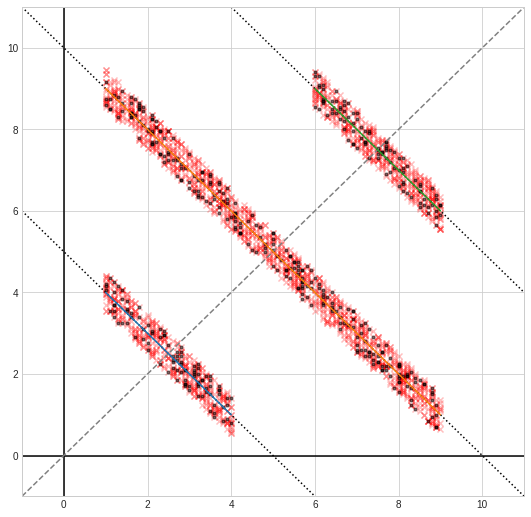

In [425]:
plt.figure(figsize = [9, 9])
plt.axis([-1, 11, -1, 11])

plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')

plt.axline([0, l1.f(0)], slope = l1.m, color = 'black', linestyle = ':')
plt.axline([0, l2.f(0)], slope = l2.m, color = 'black', linestyle = ':')
plt.axline([0, l3.f(0)], slope = l3.m, color = 'black', linestyle = ':')

plt.axline([0,0], slope = 1, color = 'grey', linestyle = '--')

plt.plot([1, l1.f(1)], [4, l1.f(4)])
plt.plot([1, l2.f(1)], [9, l2.f(9)])
plt.plot([6, l3.f(6)], [9, l3.f(9)])

plt.scatter(X1, Y1, color = 'red', marker = 'x', alpha = 0.25)
plt.scatter(X2, Y2, color = 'red', marker = 'x', alpha = 0.25)
plt.scatter(X3, Y3, color = 'red', marker = 'x', alpha = 0.25)

plt.scatter(X1s, Y1s, color = 'black', marker = '.', alpha = 0.5)
plt.scatter(X2s, Y2s, color = 'black', marker = '.', alpha = 0.5)
plt.scatter(X3s, Y3s, color = 'black', marker = '.', alpha = 0.5)

plt.show()